<a href="https://colab.research.google.com/github/DiegoRinconP/Mineria_de_datos/blob/main/Pruebas_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS

El primer paso es importar las librerías que se usarán en el proceso. *Seaborn* es una librería que genera fácilmente diferentes gráficos.

In [10]:
import seaborn as sns
import pandas as pd
import numpy as np

Se abre la base de datos iris y se conocen los datos que contiene.

In [11]:
iris=sns.load_dataset("iris")

In [12]:
iris.shape

(150, 5)

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


A continuación se muestra el diagrama de caja con la ayuda de la función **boxplot**.

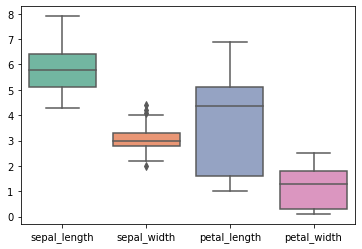

In [14]:
bp = sns.boxplot(data=iris, orient="v", palette="Set2")

También, se puede mostrar el boxplot con la ayuda de la siguiente librería.

In [15]:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x7f362945add0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f36293e3dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f36293eae10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f36293ea8d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f36293e3350>,
  <matplotlib.lines.Line2D at 0x7f36293e3890>]}

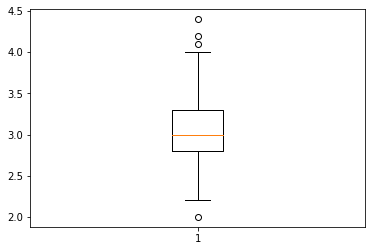

In [16]:
plt.boxplot(iris["sepal_width"])

Después de observar que hay presencia de datos atípicos, es hora de saber sus valores.

In [17]:
outliers = []
def outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1 #calcula el iqr
    lim_inf = q1-(1.5*IQR) #limite inf
    lim_sup = q3+(1.5*IQR) #limite sup
    # Ciclo para saber cuales son atípicos
    for i in data: 
        if (i<lim_inf or i>lim_sup):
            outliers.append(i)
    return outliers
out = outliers_iqr(iris["sepal_width"])
print("Los outliers por el método IQR son: ", out)

Los outliers por el método IQR son:  [2.0, 4.1, 4.2, 4.4]


# TREATMENT

El primer paso es importar las librerías que se usarán.

In [18]:
bd=sns.load_dataset("iris")

# Winsorizing

Antes de trabajar con el proceso Winsorize, es recomendable realizar una copia de la base de datos para que sea más ordenado.


In [19]:
bd_win = bd.copy(deep=True) #crea una copia de la base de datos para trabajar en ella

Posteriormente se importa winsorize desde la librería Scipy.

In [20]:
from scipy.stats.mstats import winsorize

Con la librería cargada, se procede a usar la función winsorize para poder transformar los outliers como se desee.

In [21]:
bd_win['SepalW_w_5%'] = winsorize(bd['sepal_width'], limits=(0.05, 0.05))#winsorizing con k=5 (5% y 95%)

Si se quieren saber los valores con los que estará trabajando el proceso,
 se puede realizar lo siguiente con ayuda de la librería numpy.

In [22]:
noventaycinco_pct = np.percentile(bd.sepal_width, 95) 
cinco_pct = np.percentile(bd.sepal_width, 5) 
print("valor del 95%:",noventaycinco_pct)
print("valor del 5%:",cinco_pct)

valor del 95%: 3.8
valor del 5%: 2.3449999999999998


Para poder ver como trabajó el winsorizing, se pueden graficar las gráficas de distribución tanto de los datos con y sin el proceso.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


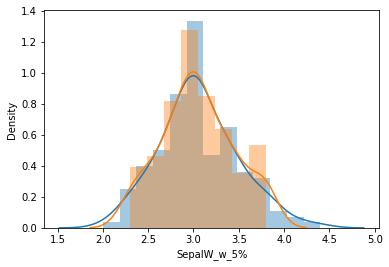

In [23]:
#Distribución sin winsorize
sns.distplot(bd['sepal_width']) #plot en color azul

#Nueva Distribución con Winsorize
sns.distplot(bd_win['SepalW_w_5%']) #plot en color naranja

In [24]:
outliers = []
def outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1 #calcula el iqr
    lim_inf = q1-(1.5*IQR) #limite inf
    lim_sup = q3+(1.5*IQR) #limite sup
    # Ciclo para saber cuales son atípicos
    for i in data: 
        if (i<lim_inf or i>lim_sup):
            outliers.append(i)
    return outliers
out = outliers_iqr(bd["sepal_width"])
print("Los outliers por el método IQR son: ", out)

Los outliers por el método IQR son:  [2.0, 4.1, 4.2, 4.4]


In [25]:
out

[2.0, 4.1, 4.2, 4.4]

# Imputación media/mediana

In [26]:
median=np.median(bd.sepal_width)  
median

3.0

Ya con el valor de la mediana, se utiliza la función where de Numpy para poder cambiar los valores outliers por el valor de la mediana.

In [27]:
q1 = np.percentile(bd.sepal_width, 25)
q3 = np.percentile(bd.sepal_width, 75)
IQR = q3-q1 #calcula el iqr
lim_inf = q1-(1.5*IQR) #limite inf
lim_sup = q3+(1.5*IQR) #limite sup 
print("limites inferior y superior:",lim_inf,lim_sup)

a=np.where((bd.sepal_width > lim_sup) | (bd.sepal_width < lim_inf),median,bd.sepal_width) 
# where funciona como un if else; el símbolo | es como un or.
print(a)

limites inferior y superior: 2.05 4.05
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  3.  3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 3.  3.  3.1 3.2
 3.5 3.6 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3 3.2 3.2 3.1 2.3
 2.8 2.8 3.3 2.4 2.9 2.7 3.  3.  2.2 2.9 2.9 3.1 3.  2.7 2.2 2.5 3.2 2.8
 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4 3.1 2.3 3.  2.5
 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8 3.3 2.7 3.  2.9 3.  3.  2.5 2.9
 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2
 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.  3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2
 3.3 3.  2.5 3.  3.4 3. ]


En este proceso se busca reemplazar los valores de los outliers con los valores  de la mediana de los datos para bajar la influencia de los outliers en la media.

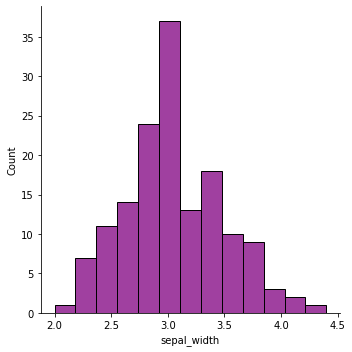

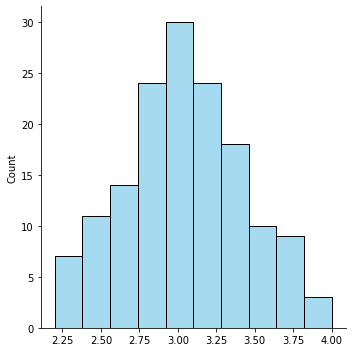

In [28]:
#Distribución con outliers
sns.displot(bd['sepal_width'],color="purple") 

#Distribución sin outliers
sns.displot(a,color="skyblue") 